In [1]:
from mne_bids import make_bids_basename
from pathlib import Path, PurePath
import helper
import seaborn
import mne
import os
import matplotlib.pyplot as plt
import pandas as pd
import matlab.engine
import numpy as np
import scipy as sp
import scipy.io
pd.options.display.html.table_schema = True
pd.options.display.max_rows = None
from mne.time_frequency import psd_multitaper
%matplotlib 

Using matplotlib backend: Qt5Agg


In [2]:
proc = 'BP'
subid = 'JuRo'
cfsubdir = Path('~','CIFAR_data','iEEG_10','subjects', subid, 'EEGLAB_datasets', 'bipolar_montage').expanduser()
fname = helper.CIFAR_filename(subid=subid,task='sleep',proc=proc)
fpath = cfsubdir.joinpath(fname)
fpath = os.fspath(fpath)
raw = mne.io.read_raw_eeglab(fpath)

Reading /home/guime/CIFAR_data/iEEG_10/subjects/JuRo/EEGLAB_datasets/bipolar_montage/JuRo_freerecall_sleep_preprocessed_BP_montage.fdt


<ipython-input-2-c151879a88de>:7: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fpath)


In [3]:
bad_chan = ['OSAT', 'PR', 'ECG', 'TRIG', 'Event', 'RDh1-RDh6', 'RIa1-RIa2', 'RDh2-RDh6']
raw.info['bads'] = bad_chan

In [11]:
events = mne.make_fixed_length_events(raw, duration=20) #Make events of 20 sec duration
epochs = mne.Epochs(raw, events, tmin=-0.2, tmax=20.5)
#epochs.load_data()

608 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [12]:
print(epochs)

<Epochs  |   608 events (good & bad), -0.2 - 20.5 sec, baseline [None, 0], ~206 kB, data not loaded,
 '1': 608>


Loading data for 608 events and 351 original time points ...
1 bad epochs dropped
Loading data for 487 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...


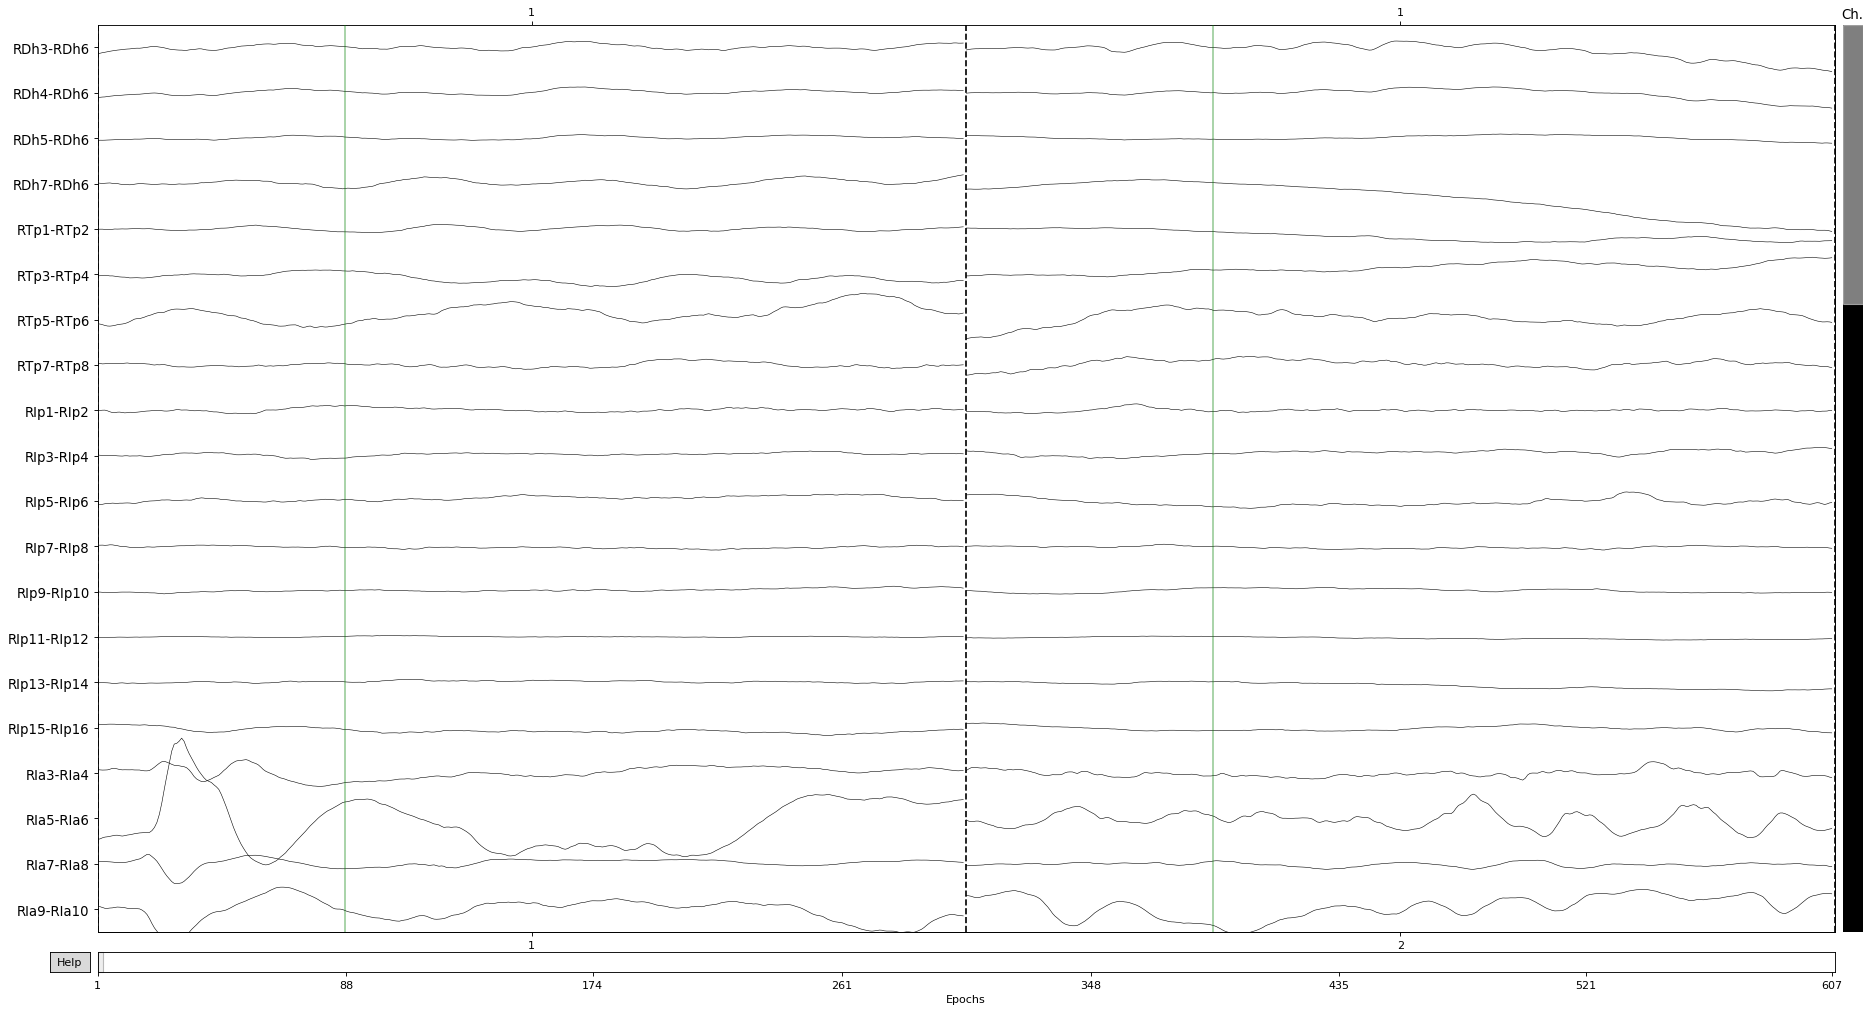

Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points ...
Loading data for 2 events and 351 original time points .

In [7]:
epochs.plot(n_epochs=2, scalings=4e-4, butterfly=False)

In [17]:
#_, data_subdir = helper.subject_path()

AttributeError: module 'helper' has no attribute 'subject_path'

    Using multitaper spectrum estimation with 7 DPSS windows


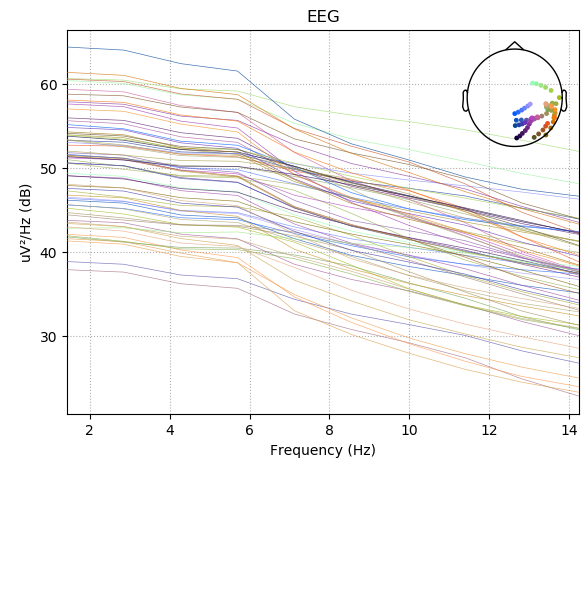

In [22]:
epochs.plot_psd(fmin=0.1, fmax=15, average=False)